<center><bold>Assignment 1</bold></center>
<center>Mohamed A. AbdelHamed - 900163202</center>
<center>oscar@aucegypt.edu</center>

# Part 1:
## Transformation Formats:





In [1]:
from parse_utils import trans_format
print(trans_format)


Please insert a list of your transformations in the following format:
<trans_key1 ...args1> <trans_key2 ...args2> ... <trans_key_n ...args_n> 

Available transormations:
<TRANS offset>
<SCALE Sx Sy>
<ROT angle(degrees) Px Py>
<NTHP n>
<HE>



## (a) Matrix transformations:  
### i. Translations:


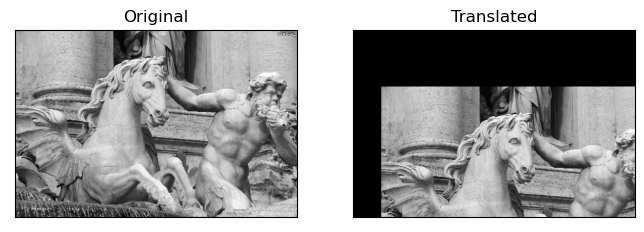

In [2]:
import part1
trans = '<TRANS 50 100>'
part1.run(interactive=False, img_path='samples/rome.jpg', trans_str=trans, effect='Translated')

### ii. Rotation:

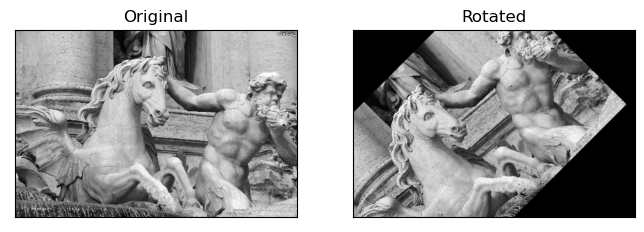

In [3]:
import part1
trans = '<ROT 45 250 250>'
part1.run(interactive=False, img_path='samples/rome.jpg', trans_str=trans, effect='Rotated')

### iii. Scaling:
Note the axes values are used to observe new scaling in pixels.

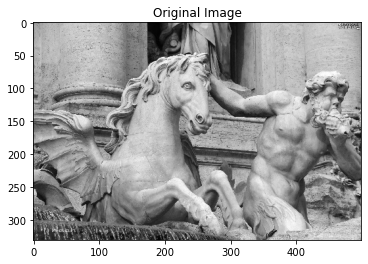

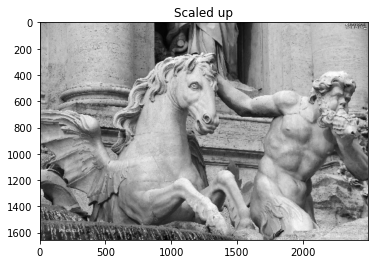

In [4]:
import part1
trans = '<SCALE 5 5>'
part1.run(interactive=False, img_path='samples/rome.jpg', trans_str=trans, effect='Scaled up', side_by_side=False)

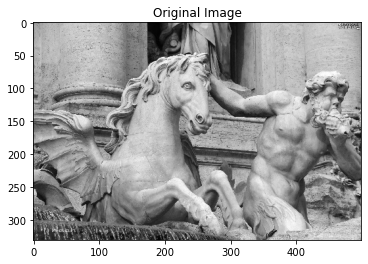

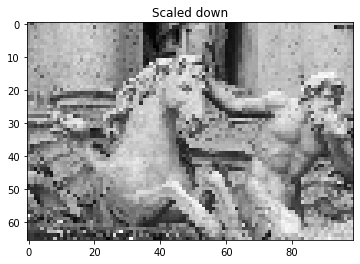

In [5]:
import part1
trans = '<SCALE 0.2 0.2>'
part1.run(interactive=False, img_path='samples/rome.jpg', trans_str=trans, effect='Scaled down', side_by_side=False)

**Comments**:  
1. Scaling up does not show notable gaps because the transformation is executed in reverse (i.e. looping over destination pixel instead of source pixels).  
2. Scaling down clearly reduces image quality due to loss of pixels.

### iv. Combined Transformations:
Note that the program also supports mixing transformations with the ones in part b (HE, and $n^{th}$ power).

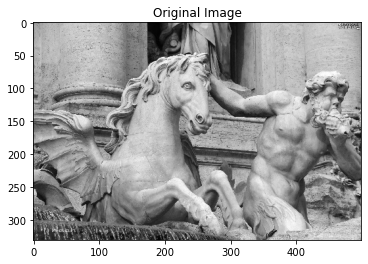

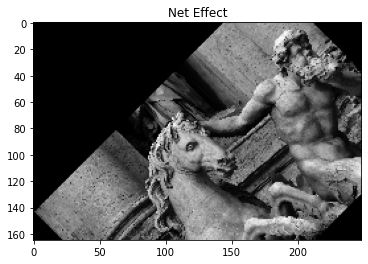

In [6]:
import part1
trans = '''
<TRANS 50 100>
<ROT 45 250 250>
<SCALE 0.5 0.5>
<NTHP 2>
'''
part1.run(interactive=False, img_path='samples/rome.jpg', trans_str=trans, effect='Net Effect', side_by_side=False)

## (b):
### i. $n^{th}$ power:

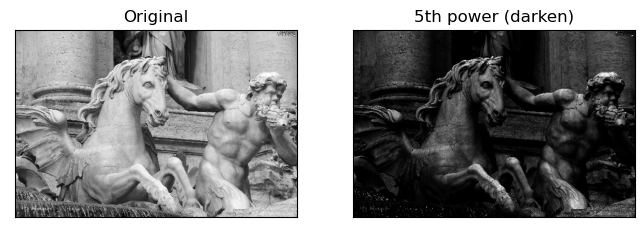

In [1]:
import part1
trans1 = '<NTHP 5>'
part1.run(interactive=False, img_path='samples/rome.jpg', effect="5th power (darken)", trans_str=trans1)

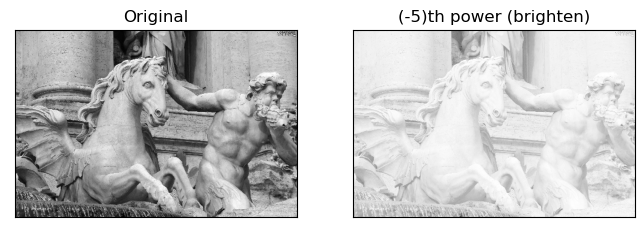

In [6]:
import part1
trans2 = '<NTHP 0.2>'
part1.run(interactive=False, img_path='samples/rome.jpg', effect="(-5)th power (brighten)", trans_str=trans2)

### ii. Histogram Equalization:


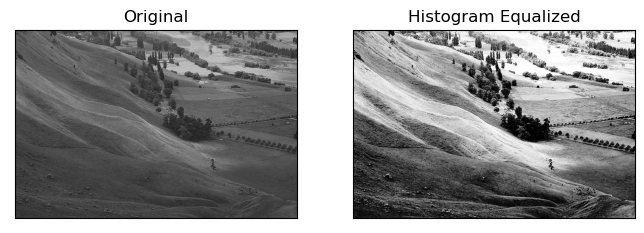

In [3]:
import part1
trans = '<HE>'
part1.run(interactive=False, img_path='samples/he.jpg', effect="Histogram Equalized", trans_str=trans)

# Part 2:
## (a) Smoothing Filter (using averaging):
$F_{avg} = \frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$  
**Sample run on a sharpened image:**


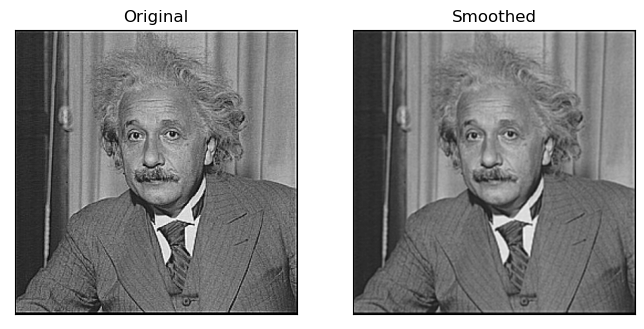

In [10]:
from part2 import part_a
part_a()


## (b) Gradient Filter (Laplacian):
$F_{lap} = \begin{bmatrix} 1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1 \end{bmatrix}$  
**Sample run:**

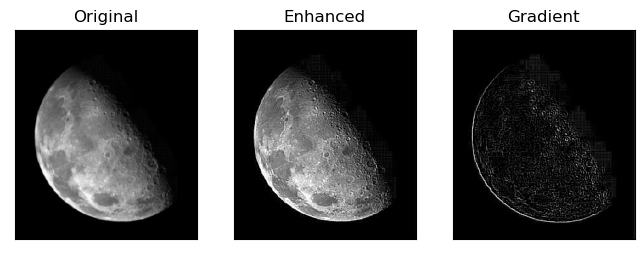

In [11]:
from part2 import part_b
part_b()

## (c) Sharpening Filter:
$F_{sharp} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 0 \end{bmatrix} - \frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$  
**Sample run on smoothed image:**

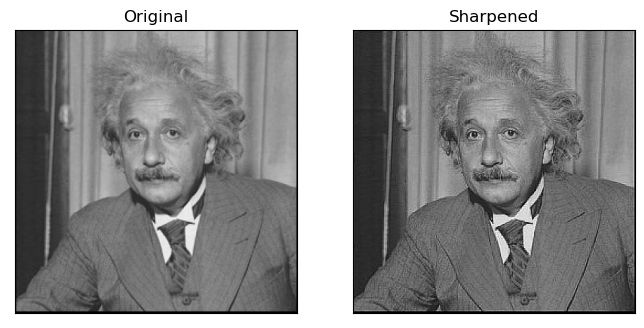

In [12]:
from part2 import part_c
part_c()

# Part 3:
## (a) One other separable filter would be the vertical (or horizontal) Sobel filter for edge detection:  
For our example, we use the vertical edge filter:  
2D Sobel = $F = \begin{bmatrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}$  
1D Decomposition:  
$F_1 = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}$, $F_2 = \begin{bmatrix} 1 & 0 & -1 \end{bmatrix} \text{ such that } \space F = F_1.F_2$

## (b)  
To extend the Sobel filter to larger sizes, the method described in [this paper](https://www.groundai.com/project/custom-extended-sobel-filters/1) was used.  
Below are the results comparison for different filter sizes (2D vs. Separated 1D):


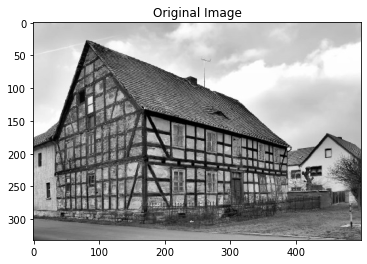

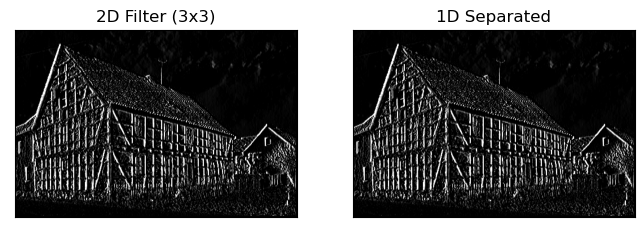

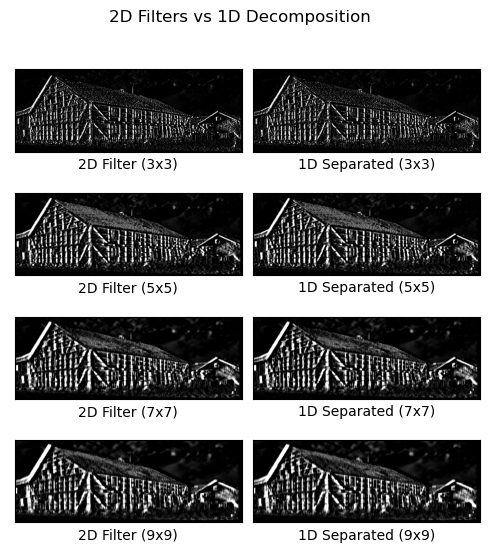

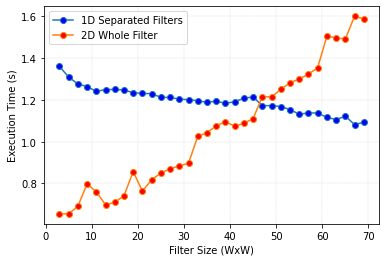

In [1]:
import part3
part3.run()

**Comments:**  
1. Filtered images are emphasizing the vertical lines as expected.  
2. For the same filter size, the 1D and 2D filter versions look identical as expected.  
3. For relatively small filter sizes, program overheads (e.g. loop packing, memory allocation, copying) dominate the performance gain of filter separation until filter size is large enough for the gain to appear (when the gap starts to close).  
4. The consistency of the trend shown is fragile due to high sensitivity in execution time with relatively small filters.